In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e5/sample_submission.csv
/kaggle/input/playground-series-s3e5/train.csv
/kaggle/input/playground-series-s3e5/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
sub=pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')

In [4]:
train.head(20)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.500,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.300,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.510,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.870,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.360,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
5,5,9.9,0.510,0.44,2.2,0.111,30.0,134.0,0.99820,3.11,0.54,9.6,5
6,6,7.2,0.870,0.00,2.3,0.080,6.0,18.0,0.99552,3.34,0.60,11.3,6
7,7,7.5,0.430,0.32,1.8,0.066,18.0,40.0,0.99560,3.30,0.43,9.7,6
8,8,11.6,0.380,0.55,2.2,0.084,17.0,40.0,1.00080,3.17,0.73,9.8,6
9,9,7.8,0.780,0.09,2.2,0.049,13.0,29.0,0.99682,3.51,0.49,9.5,5


In [5]:
train['volatile acidity'].mean()

0.5276006809338522

## Data normalization

In [6]:
y=train.pop('quality')
x=train.drop('Id',axis=1)

In [7]:
# # min max normalization
# def min_max_normalization(df):
#     return (df - df.min()) /(df.max()-df.min())
# x=min_max_normalization(x)
# x.head()

In [8]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5


# Correlation between features

<AxesSubplot:>

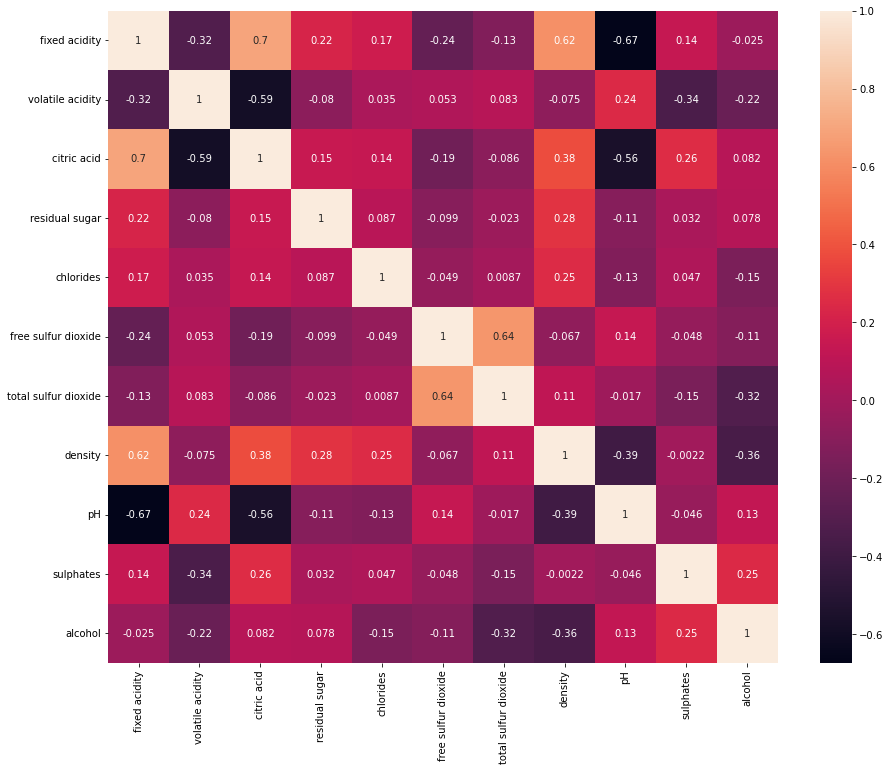

In [9]:
Corr=x.corr()
plt.figure(figsize=(15,12))
sns.heatmap(Corr,annot=True,linecolor='white')

In [10]:
x.shape,y.shape

((2056, 11), (2056,))

In [11]:
Corr=x.corrwith(y,axis=0)
Corr

fixed acidity           0.073852
volatile acidity       -0.219287
citric acid             0.141797
residual sugar          0.048156
chlorides              -0.046624
free sulfur dioxide    -0.060217
total sulfur dioxide   -0.225670
density                -0.153198
pH                      0.016378
sulphates               0.366939
alcohol                 0.482833
dtype: float64

# Model

In [12]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import load_iris

# # Define the parameter grid to search
# param_grid = {'criterion':['gini','entropy'],
#               'n_estimators': [10, 50, 100, 200,500,100],
#               'max_depth': [None, 3, 5, 7,8,10,15,20],
#              'class_weight':['class_weights',None],
#              'max_features':['sqrt', 'log2', None],
#               'bootstrap':[True,False]}

# # Initialize the RandomForestClassifier
# rfc = RandomForestClassifier()

# # Use GridSearchCV to find the best hyperparameters for the classifier
# grid_search = GridSearchCV(rfc, param_grid, cv=5)
# grid_search.fit(x, y)

# # Print the best hyperparameters found by GridSearchCV
# print("Best hyperparameters: ", grid_search.best_params_)

## RandomForestClassifier

Hyperparameters:
{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'n_estimators': 100}

### Comment: 
- fitting entire data using model.fit(x,y) gave 0.527.
- Prediction using trained data gave 0.563.

In [13]:
train_x,val_x,train_y,val_y=train_test_split(x,y,train_size=0.75,random_state=1)
unique, counts = np.unique(train_y, return_counts=True)
class_weights = dict(zip(unique, 1/counts))
model=RandomForestClassifier(criterion='entropy',
                             n_estimators=95,
                             max_depth=6,
                             max_features=None,
                             bootstrap=True,
                             random_state=1,
                             #class_weight=class_weights
                             ) 
model.fit(train_x,train_y)
y_pred=model.predict(train_x)
val_pred=model.predict(val_x)
score_train=cohen_kappa_score(y_pred,train_y)
score_val=cohen_kappa_score(val_pred,val_y)
print(score_train,score_val)

0.5260504538575386 0.333491952081276


In [14]:
test_x=test.iloc[:,1:]
#test_x=min_max_normalization(test_x)
test_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [15]:
#model.fit(x,y)
y_pred=model.predict(test_x)
submission=pd.DataFrame({'Id':test['Id'],'quality':y_pred})
submission.to_csv('submission.csv',index=False)